# EDA: mortality data

Plot 11 mortality-related indicators by geography (CCG, inner/outer ring), over time. 

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import os
pd.set_option('display.max_colwidth', None)    # stop the column text truncating... 
pd.set_option("display.max_rows", None, "display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('./cleaned_data_output/mortality_data/cleaned_mortality_data.csv')

In [3]:
# Make new (short) Indicator name column (for facetgrid viewing)
def new_name(old_name):
    name_dict = {
        'Mortality rate from chronic obstructive pulmonary disease': 'COPD', 
        'Under 75 mortality rate from respiratory disease': 'Under 75 Resp Disease',
        'Under 75 mortality rate from respiratory disease considered preventable (2016 definition)': '<75 RD Preventable 16',
        'Mortality rate from pneumonia (underlying cause)' : 'Pneumonia (underlying cause)',
        'Mortality rate from pneumonia (all mentions)': 'Pneumonia (all mentions)',
        'Mortality rate from COPD as a contributory cause' : 'COPD (contributory cause)',
        'Mortality rate from asthma' : 'Asthma', 
        'Under 75 mortality rate from respiratory disease considered preventable (2019 definition)': '<75 RD Preventable 19',
        'Coronary heart disease mortality rates, under 75 years' : '<75 Coronary Heart Disease',
        'Stroke mortality rates, under 75 years (age standardised)' : 'Under 75 Stroke',
        'Stroke mortality rates, over 75 years (age standardised)' : 'Over 75 Stroke'
    }
    
    return name_dict.get(old_name)
    
df["Indicator"] = df["Indicator Name"].apply(new_name)

In [4]:
# for now, let's just look at "persons" data (not male or female)
df = df[df.Sex == 'Persons']

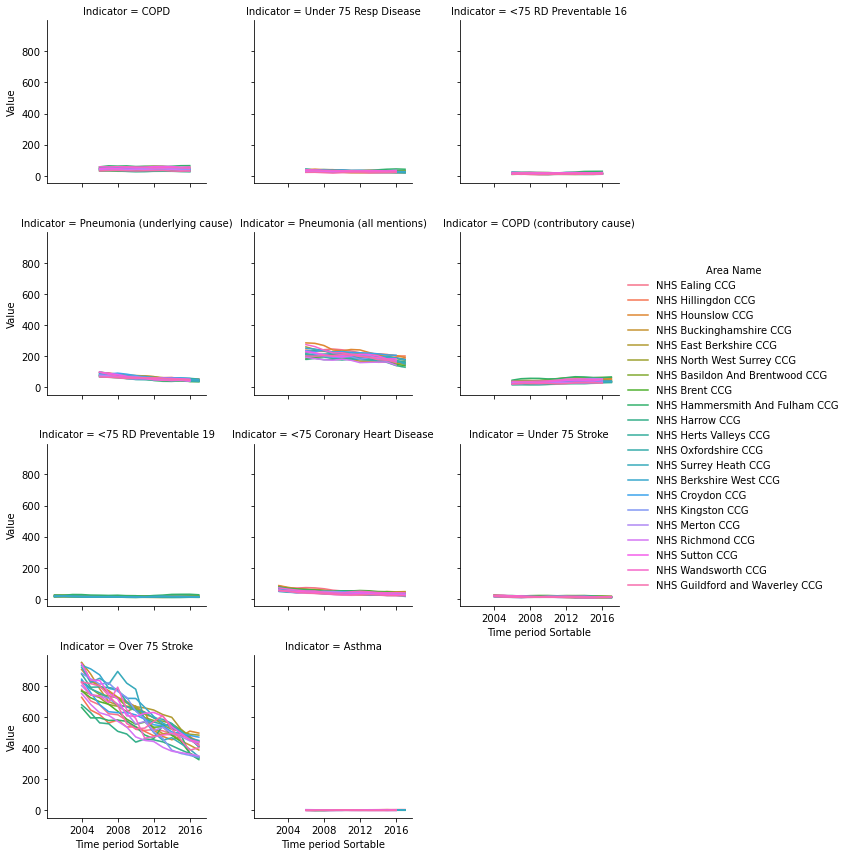

In [5]:
# Create series of plots where each plot represents one indicator and each line is a CCG, over time

g = sns.FacetGrid(df, col='Indicator', hue='Area Name', col_wrap=3)
g.map(sns.lineplot, 'Time period Sortable', 'Value').add_legend()
g.set(xticks=np.arange(2004, 2020, 4))
g.fig.subplots_adjust(hspace=0.3, wspace=.3)

These results show us that stroke mortality rates for people over 75 are far higher than anything else, but that over time these rates are dropping significantly. Pneumonia (all mentions) and then pneumonia (underlying cause) are both also higher rates, trending down. 

Let's take a closer look at the other graphs so we can start to see other trends. 

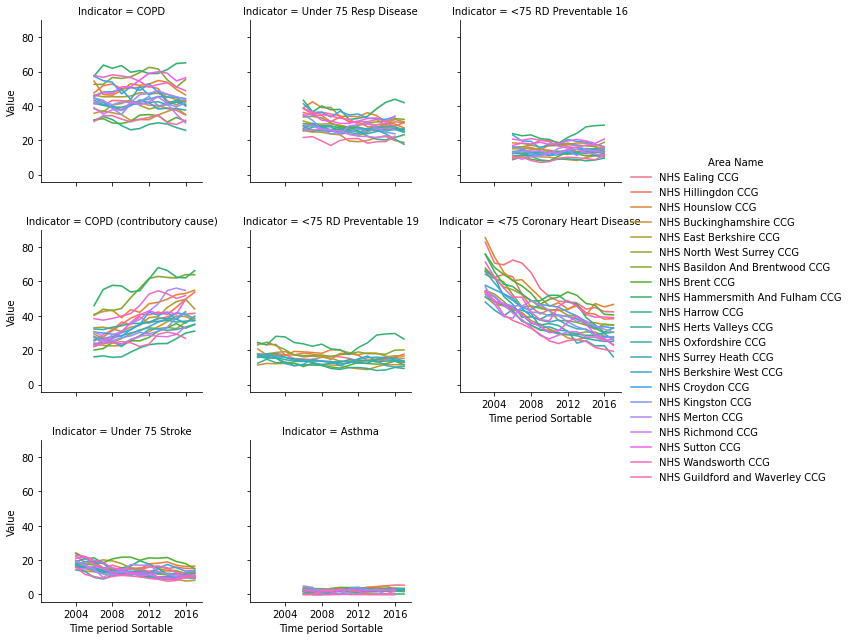

In [6]:
# Create series of plots where each plot represents one indicator and each line is a CCG, over time
# Don't include stroke mortality for people over 75 or pneumonia (both indicators)
indicators = [1204, 40701, 40702, 93643, 93644, 93724, 91059, 91061]
df_without_stroke_pneumonia = df[df["Indicator ID"].isin(indicators)]

g = sns.FacetGrid(df_without_stroke_pneumonia, col='Indicator', hue='Area Name', col_wrap=3)
g.map(sns.lineplot, 'Time period Sortable', 'Value').add_legend()
g.set(xticks=np.arange(2004, 2020, 4))
g.fig.subplots_adjust(hspace=0.3, wspace=.3)

These results show us that mortality by COPD (as a contributory cause) rates are rising. Mortality rates for coronary heart disease for people under 75 are dropping. The other indicators appear relatively steady. There are too many indicators (and the color keys are similar enough) to make conclusions by CCG obvious. 

Let's make another series of plots where each plot is a CCG 

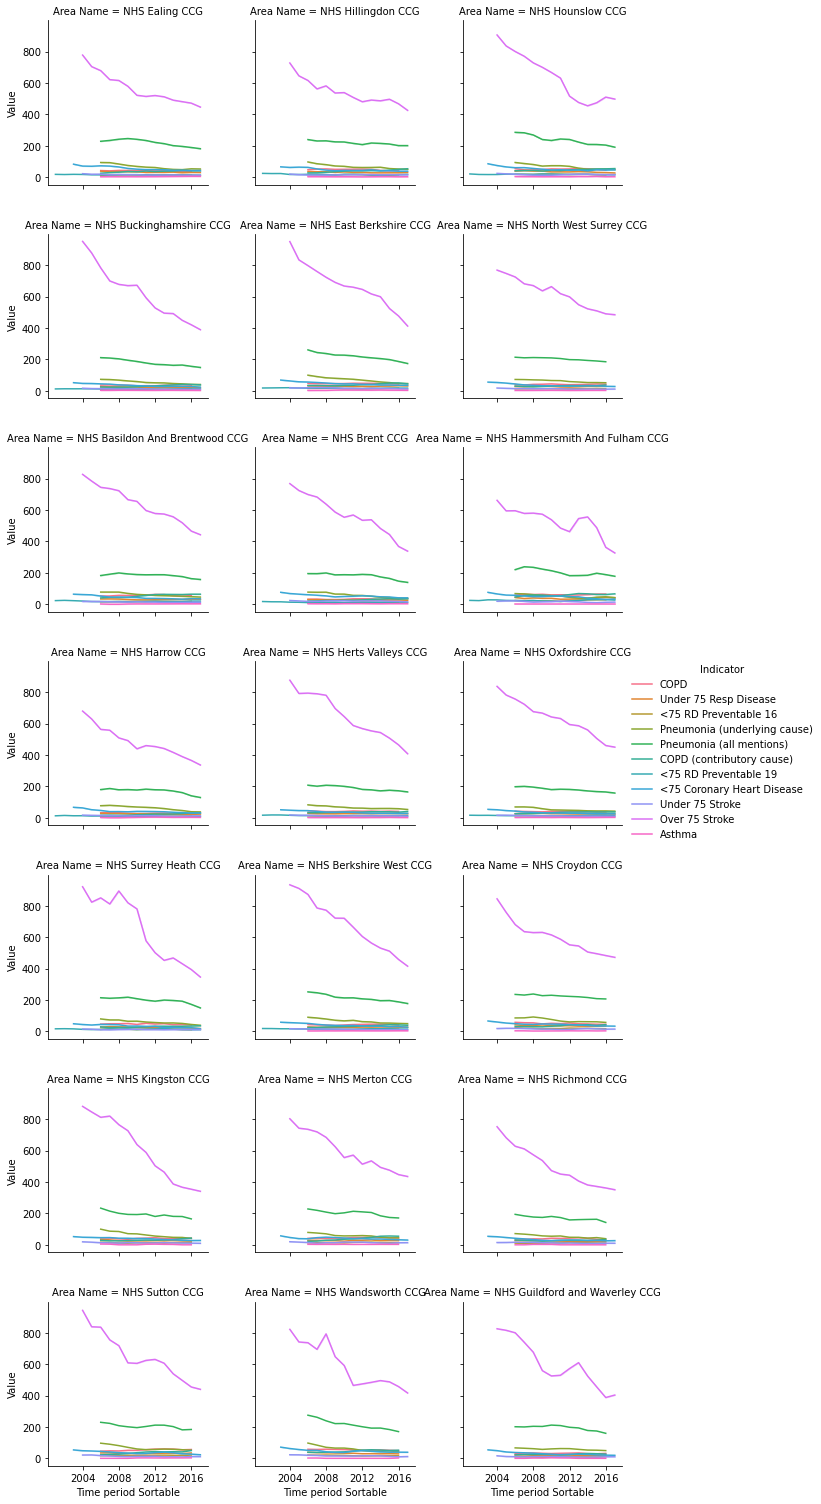

In [7]:
# Create series of plots where each plot represents one CCG and each line is an indicator, over time

g = sns.FacetGrid(df, col='Area Name', hue='Indicator', col_wrap=3)
g.map(sns.lineplot, 'Time period Sortable', 'Value').add_legend()
g.set(xticks=np.arange(2004, 2020, 4))
g.fig.subplots_adjust(hspace=0.3, wspace=.3)

These results make it very obvious that pneumonia and stroke are killing people at far greater rates than the other indicators. 

Again, let's remove pneumonia and stroke indicators to better see the other data:

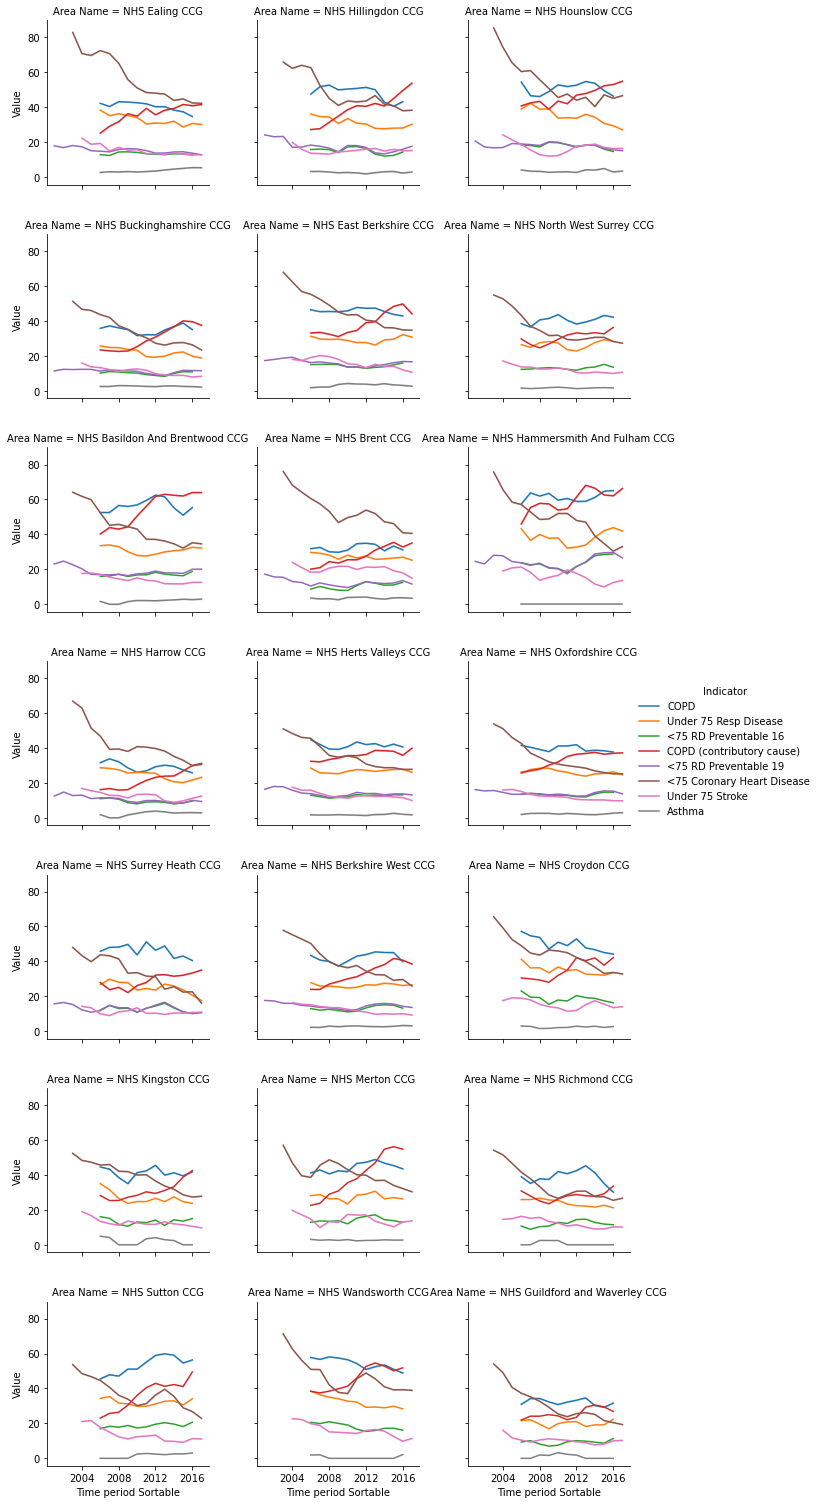

In [8]:
# Create series of plots where each plot represents one CCG and each line is an indicator, over time
# Don't include stroke mortality for people over 75 or pneumonia (both indicators)

g = sns.FacetGrid(df_without_stroke_pneumonia, col='Area Name', hue='Indicator', col_wrap=3)
g.map(sns.lineplot, 'Time period Sortable', 'Value').add_legend()
g.set(xticks=np.arange(2004, 2020, 4))
g.fig.subplots_adjust(hspace=0.3, wspace=.3)

These results make it clear that in all CCGs, COPD is a leading cause (and contributory cause) of death, followed by respiratory diseases in people under 75. Rates of death by coronary heart disease for people under 75 have been falling so much that while these rates were higher than COPD mortality rates in 2004, they are now lower than COPD and respiratory disease mortality rates in many CCGs. Asthma mortality rates are consistently the lowest across all CCGs. 

Now let's compare CCGs in the inner and outer radius: 

<ipython-input-9-8966f232660c>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 432x288 with 0 Axes>

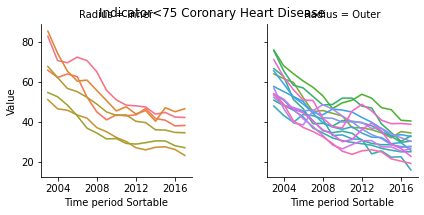

<Figure size 432x288 with 0 Axes>

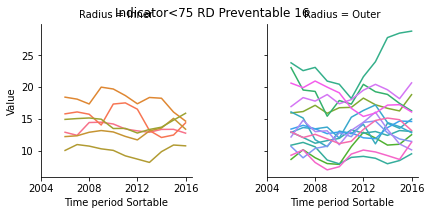

<Figure size 432x288 with 0 Axes>

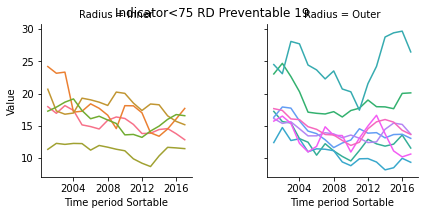

<Figure size 432x288 with 0 Axes>

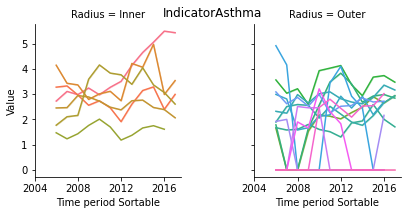

<Figure size 432x288 with 0 Axes>

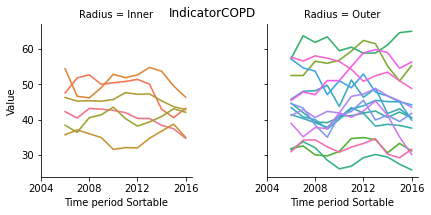

<Figure size 432x288 with 0 Axes>

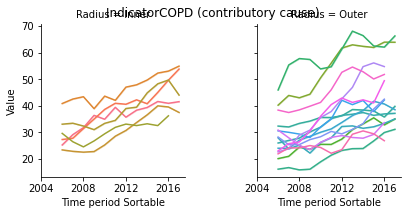

<Figure size 432x288 with 0 Axes>

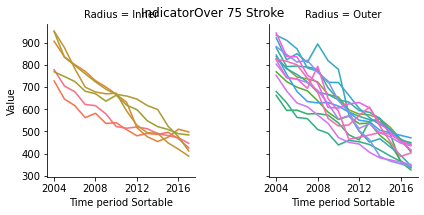

<Figure size 432x288 with 0 Axes>

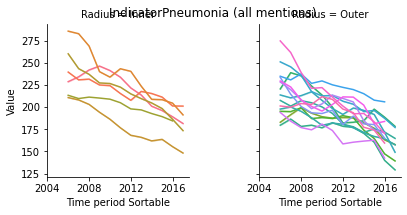

<Figure size 432x288 with 0 Axes>

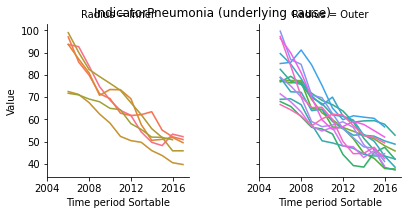

<Figure size 432x288 with 0 Axes>

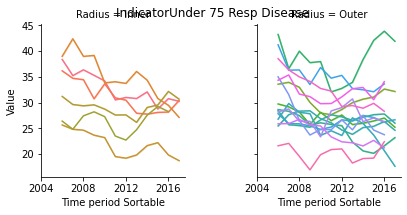

<Figure size 432x288 with 0 Axes>

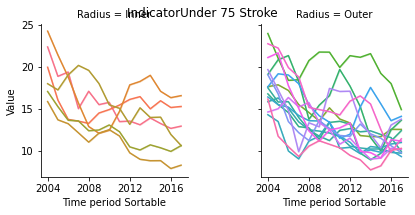

In [9]:
# Create pairs of plots where each pair represents one indicator and each plot represents CCGs in the Inner and Outer radius (each line = one CCG)
# TODO: figure out how to get "title" of indicator name to NOT overlap with subtitle "Outer Radius"

def plot(indicator, df):
    plt.figure()
    g = sns.FacetGrid(df, col='Radius', hue='Area Name')
    # choose columns for variables: x axis = time, y axis = value 
    g.map(sns.lineplot, 'Time period Sortable', 'Value')
    g.set(xticks=np.arange(2004, 2020, 4))
    g.fig.subplots_adjust(top=0.9, hspace=0.8, wspace=.5)
    title = 'Indicator' + str(indicator)
    g.fig.suptitle(title)

for group in df.groupby("Indicator"):
    plot(group[0], group[1])

There does not appear to be a clear trend where the inner radius's health outcomes are worse (ie the mortality rates are higher). Further analysis is required. 